<a href="https://colab.research.google.com/github/amandeepsaini/green-screen-anywhere/blob/main/Inference_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import random

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [17]:
def show_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

def show_img_mult(imgs, rows=5, columns=5):
  num_imgs = len(imgs)
  fig = plt.figure(figsize=(20,20))
  for i in range(num_imgs):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()


# Prepare Data

In [3]:
ds_root = "/content/gdrive/MyDrive/Colab Notebooks/Green Screen/Datasets/Test/test1"
bg_dir = os.path.join(ds_root, "bgs")
test_dir = os.path.join(ds_root, "test_images")

sample_bgs = []
test_imgs = []

for filename in os.listdir(bg_dir):
  sample_bgs.append(cv2.imread(os.path.join(bg_dir, filename)))

for filename in os.listdir(test_dir):
  test_imgs.append(cv2.imread(os.path.join(test_dir, filename)))



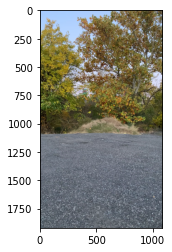

In [6]:
show_img(sample_bgs[0])

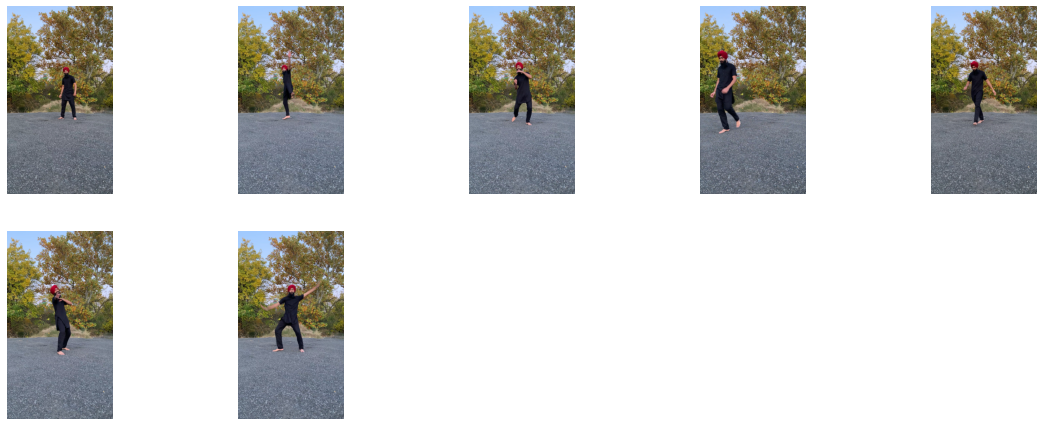

In [18]:
show_img_mult(test_imgs)

In [24]:
def square_crop(img, start_y=0, start_x=0, resize_to=None):
  h, w, c = img.shape

  if h > w:
    start_y = max(start_y, 0)
    end_y = min(start_y + w, h)
    start_y = end_y - w
    img_crop = img[start_y:end_y]

  else:
    start_x = max(start_x, 0)
    end_x = min(start_x + h, w)
    start_x = end_x - h
    img_crop = img[:,start_x:end_x]

  if resize_to is not None:
    img_crop = cv2.resize(img_crop, (resize_to, resize_to))

  return img_crop

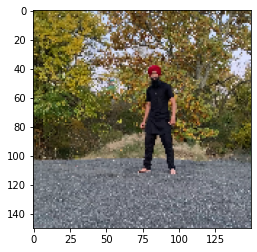

In [30]:
show_img(square_crop(test_imgs[0], start_y=350, resize_to=150))

In [45]:
bgs_cropped = [square_crop(img, start_y=350, resize_to=160).astype(np.float32)/255. for img in sample_bgs]
test_imgs_cropped = [square_crop(img, start_y=350, resize_to=160).astype(np.float32)/255. for img in test_imgs]

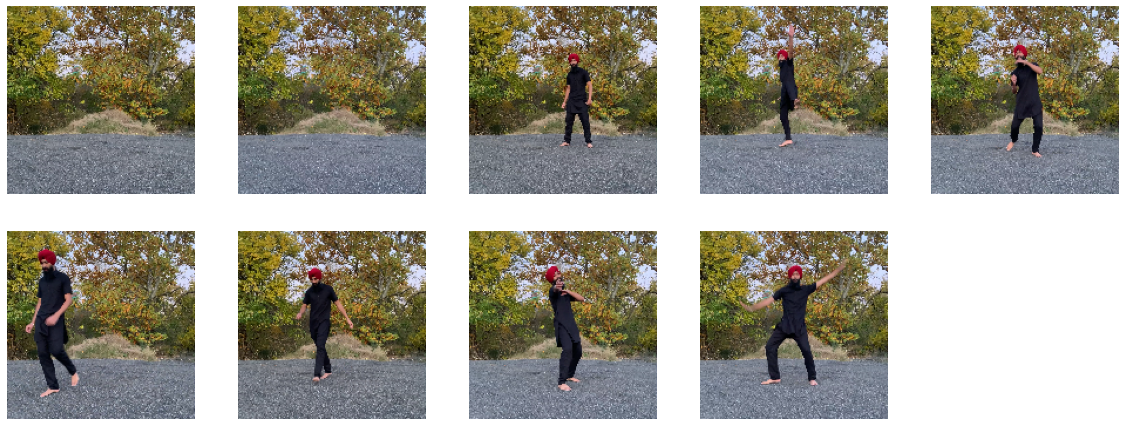

In [46]:
show_img_mult(bgs_cropped + test_imgs_cropped)

# Prepare Model

In [36]:
model_dir = "/content/gdrive/MyDrive/Colab Notebooks/Green Screen/models/model5_20epoch/"

model = keras.models.load_model(model_dir)

In [47]:
output = model.predict([test_imgs_cropped[0].reshape((1,160,160,3)), bgs_cropped[0].reshape((1,160,160,3))])

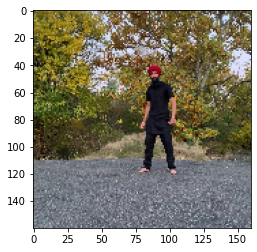

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


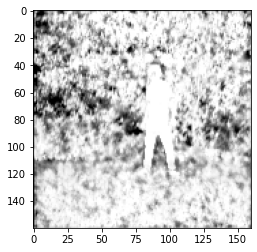

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


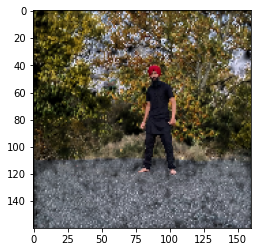

In [48]:
show_img(test_imgs_cropped[0])
show_img(output[0])
show_img(output[0]*test_imgs_cropped[0])
